In [3]:
import os
from paths import *
from C_0E_allhidrep import *

In [4]:
eval_out_dir = os.path.join(model_save_, "eval-C_0F-0527224257")

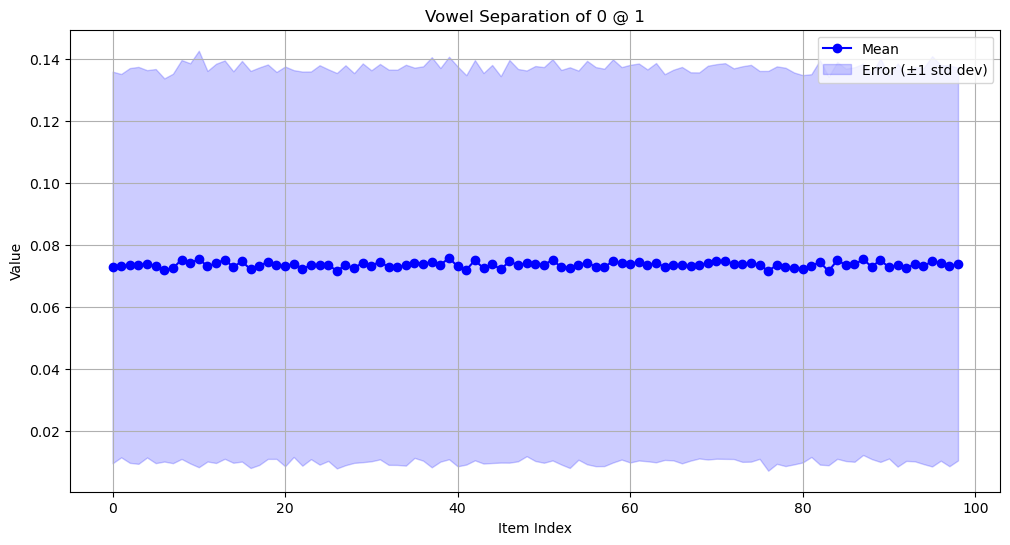

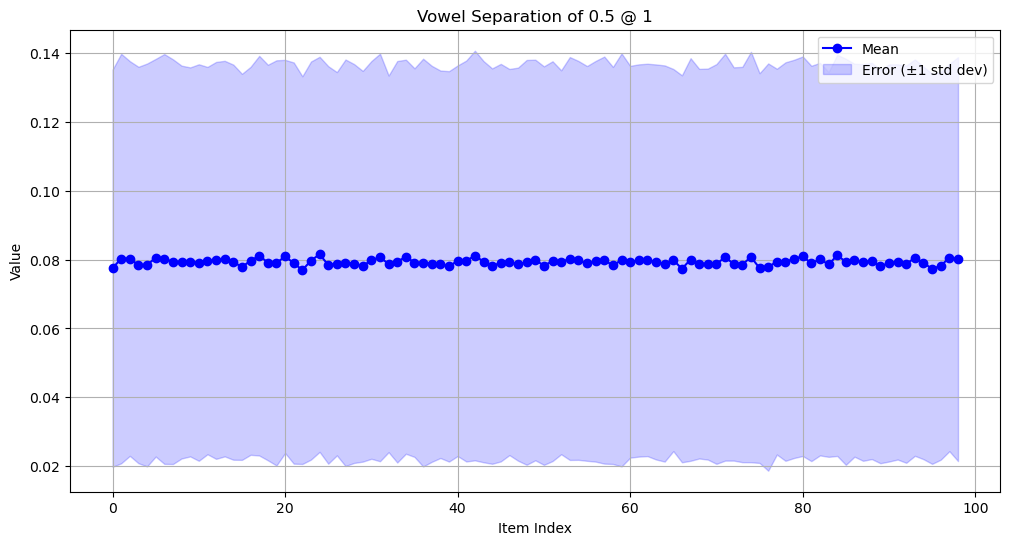

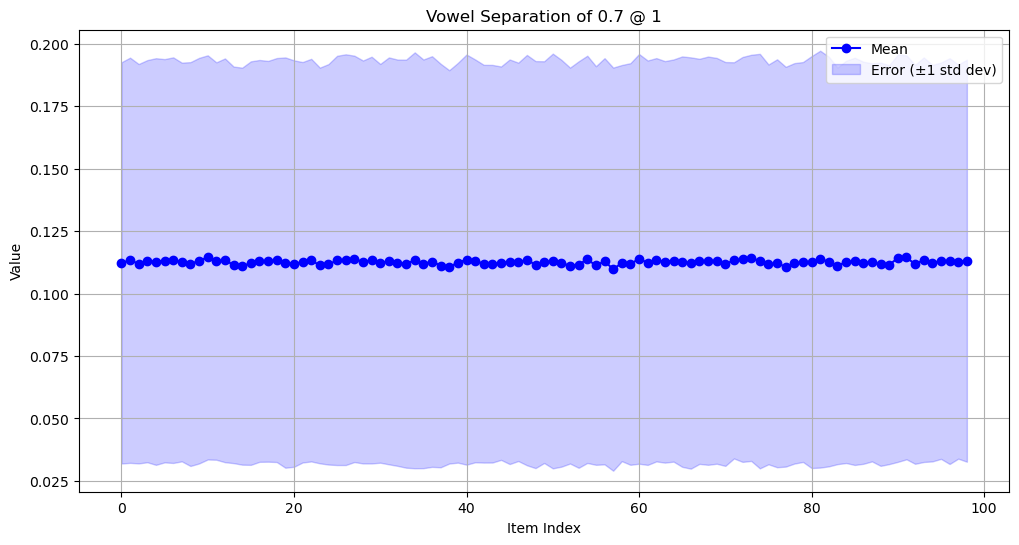

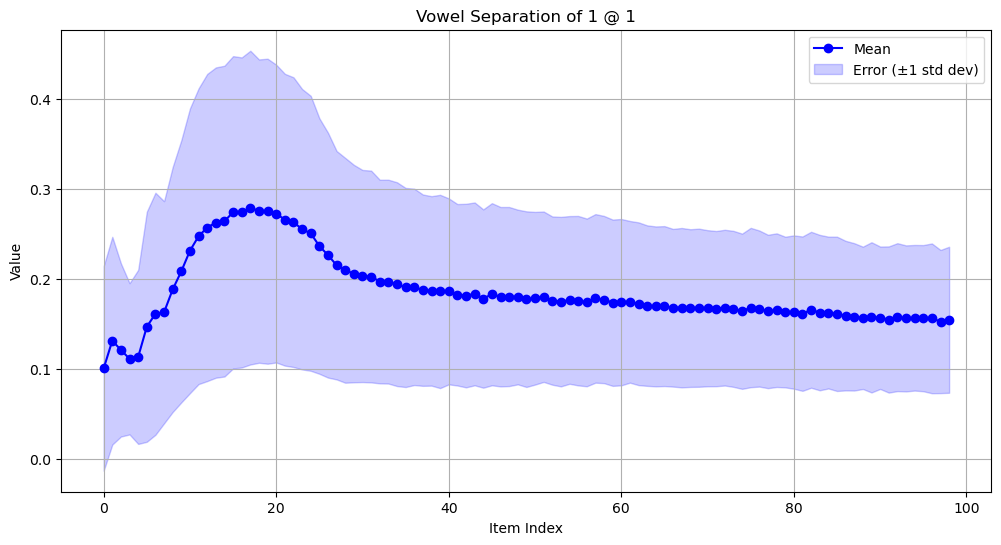

In [5]:
for model_type in ["mtl"]: 
    for condition in ["0", "0.5", "0.7", "1"]: 
        for model_num in [1]: 
            res_save_dir = os.path.join(eval_out_dir, model_type, condition, str(model_num))
            sil_scores_99 = []
            for epoch in range(1, 100): 
                sil_score_path = os.path.join(res_save_dir, f"sil_scores_{epoch}.pk")
                with open(sil_score_path, "rb") as file: 
                    sil_scores = pickle.load(file)
                sil_scores_99.append(sil_scores)

            data = np.array(sil_scores_99)

            # Calculate the mean and standard deviation for each item
            means = np.mean(data, axis=1)
            std_devs = np.std(data, axis=1)

            # Create the plot
            plt.figure(figsize=(12, 6))

            # Plot the mean
            plt.plot(means, marker='o', linestyle='-', color='b', label='Mean')

            # Plot the error as a shaded area
            plt.fill_between(range(len(means)), means - std_devs, means + std_devs, color='b', alpha=0.2, label='Error (±1 std dev)')

            # Add title and labels
            plt.title(f'Vowel Separation of {condition} @ {model_num}')
            plt.xlabel('Item Index')
            plt.ylabel('Value')
            plt.legend()

            # Show the graph
            plt.grid(True)
            plt.show()